[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ksachdeva/rethinking-tensorflow-probability/blob/master/notebooks/02_small_worlds_and_large_worlds.ipynb)

# Chapter 2 - Small Worlds and Large Worlds

## Imports and utility functions

In [1]:
# Install packages that are not installed in colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    %tensorflow_version 2.X
    
    !pip install watermark
    !pip install arviz    

In [2]:
%load_ext watermark

In [3]:
# Core
import numpy as np
import arviz as az
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import scipy.stats as stats

# visualization 
import matplotlib.pyplot as plt

# aliases
tfd = tfp.distributions

In [4]:
# config of various plotting libraries
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

## Code 2.1

In [5]:
ways = tf.constant([0., 3, 8, 9, 0])
new_ways = ways / tf.reduce_sum(ways)

new_ways

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0.  , 0.15, 0.4 , 0.45, 0.  ], dtype=float32)>

## Code 2.2

In [6]:
tf.exp(tfd.Binomial(total_count=9, probs=0.5).log_prob(6))

<tf.Tensor: shape=(), dtype=float32, numpy=0.16406247>

## Code 2.3

In [7]:
# define grid
p_grid = tf.linspace(start=0.001, stop=0.99999, num=20)

# define prior
prior = tf.repeat(1., 20)

# compute likelihood at each value in grid
likelihood = tf.exp(tfd.Binomial(total_count=9, probs=p_grid).log_prob(6))

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / tf.reduce_sum(unstd_posterior)

## Code 2.4

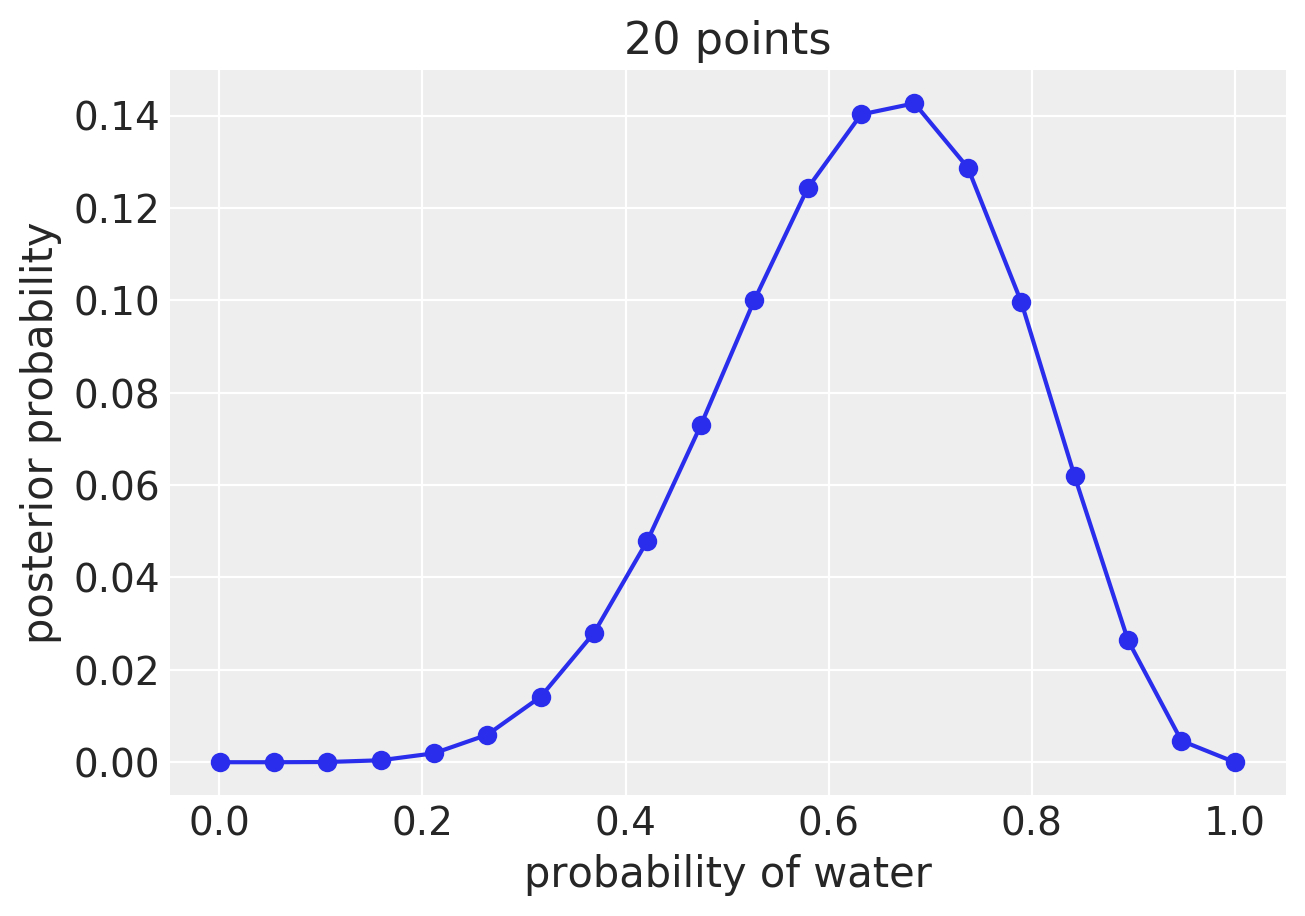

In [8]:
plt.plot(p_grid, posterior, "-o")
plt.xlabel("probability of water")
plt.ylabel("posterior probability")
plt.title("20 points");

## Code 2.5

In [9]:
prior = tf.where(p_grid < 0.5, 0, 1)
prior = tf.exp(-5 * abs(p_grid - 0.5))

## Code 2.6  (TODO - Grid approx)

In [10]:
# TODO

## Code 2.7

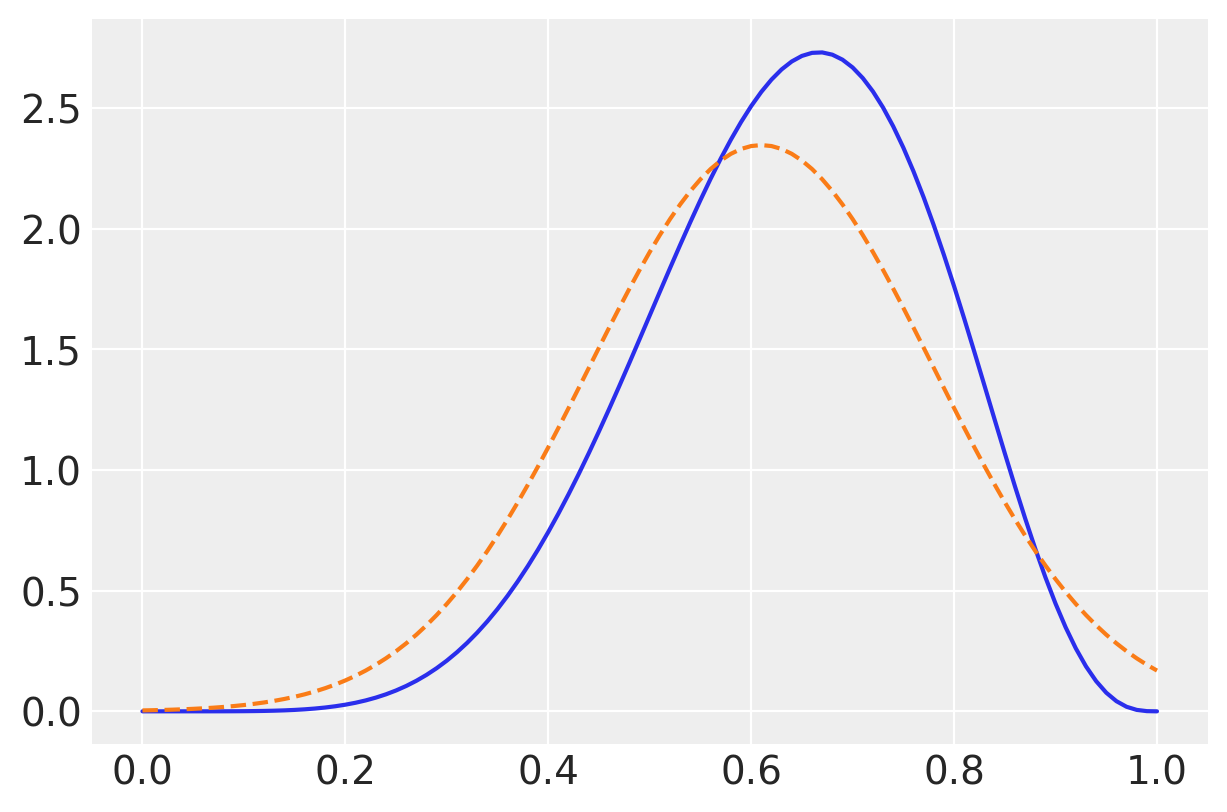

In [11]:
# analytical calculation
W = 6
L = 3
x = np.linspace(0, 1, 101)
plt.plot(x, np.exp(tfd.Beta(W + 1, L + 1).log_prob(x)))
# values obained from quadratic approximation
plt.plot(x, tf.exp(tfd.Normal(0.61, 0.17).log_prob(x)), "--");

## Code 2.8

In [12]:
n_samples = 1000
p = np.zeros(n_samples)
p[0] = 0.5
W = 6
L = 3
for i in range(1, n_samples):
    p_new = tfd.Normal(loc=p[i - 1], scale=0.1).sample(1)
    if p_new < 0:
        p_new = -p_new
    if p_new > 1:
        p_new = 2 - p_new
    q0 = tf.exp(tfd.Binomial(total_count=W+L, probs=p[i-1]).log_prob(W))
    q1 = tf.exp(tfd.Binomial(total_count=W+L, probs=p_new).log_prob(W))
    if stats.uniform.rvs(0, 1) < q1 / q0:
        p[i] = p_new
    else:
        p[i] = p[i - 1]

## Code 2.9

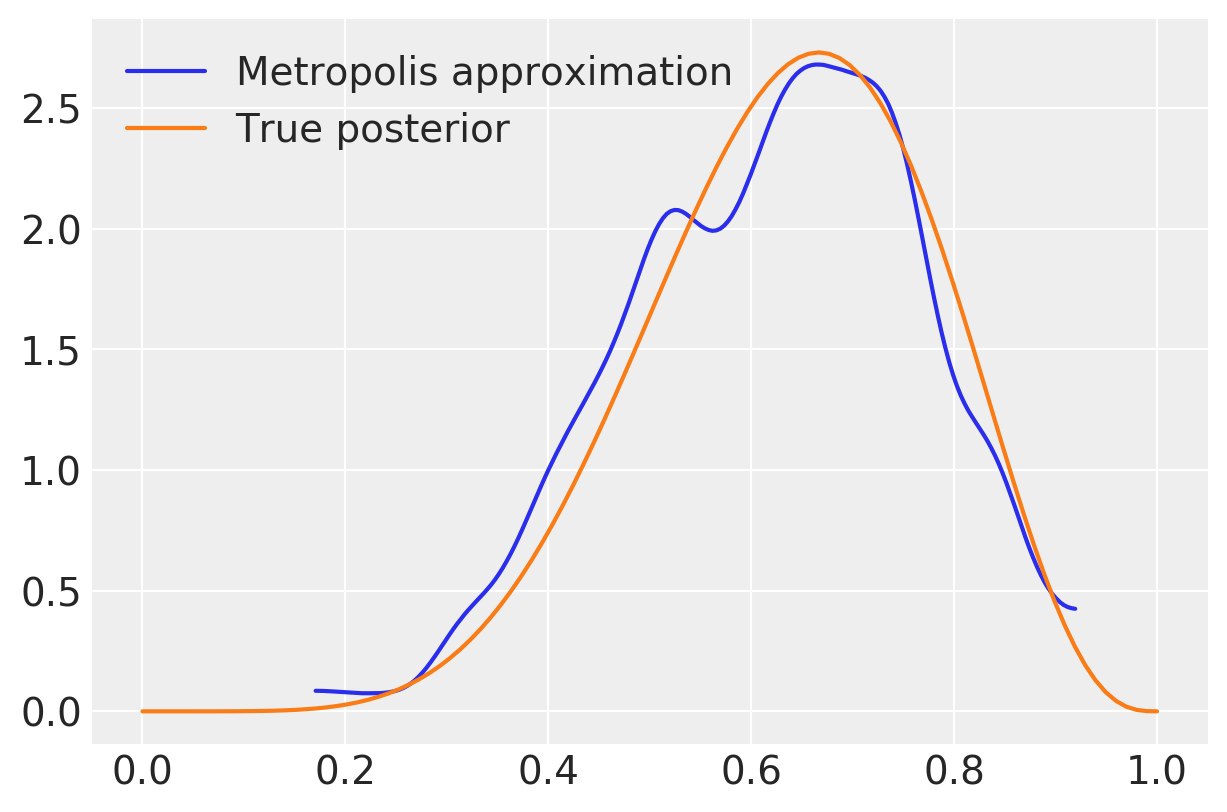

In [13]:
az.plot_kde(p, label="Metropolis approximation")
x = np.linspace(0, 1, 100)
plt.plot(x, tf.exp(tfd.Beta(W+1, L+1).log_prob(x)), "C1", label="True posterior")
plt.legend();